
#**<font color='magenta'> Adaptive Moment Estimation (Adam) Optimizer</font>**
***
**Students**


|         Full name         |   Username  |         Email         |
|---------------------------|-------------|-----------------------|
| Emmanuel Nyandu Kagarabi  | emmanuelnk  | emannuelnk@aims.ac.za |
| Hermann Michael TITCHO    | michaelt    | michaelt@aims.ac.za   |

<font color='purple'>`Welcome to this notebook related to ADAM Optimizer`</font>

# **1. Introduction**

In the world of optimization algorithms for training machine learning models, various techniques have emerged, each with its own  approach to minimizing the loss function and improving model performance. At the heart of this landscape is `Gradient Descent (GD)`, which is a foundational algorithm. GD iteratively adjusts model parameters in the opposite direction of the gradient of the entire training dataset. However, as datasets grew larger and computational resources became more limited, the need for more efficient optimization strategies arose.

`Stochastic Gradient Descent (SGD)` entered the scene as a variant of GD that introduces randomness. It updates parameters based on mini-batches sampled from the dataset, making it faster but also noisier. `Adagrad` revolutionized optimization by adapting the learning rate for each parameter based on historical gradients. It offers a personalized approach to parameter updates. `RMSProp` further refined this idea by incorporating an exponentially decaying average of past squared gradients. This allows for dynamically scaling learning rates to achieve better convergence.

But the evolution didn't stop there. `Adam` emerged as the culmination of these advancements. It seamlessly blends the benefits of RMSProp with momentum optimization, while also introducing bias correction to handle initialization biases. The result is a versatile and robust optimization algorithm that dynamically adapts to various datasets and architectures. In this project, we are focus specifically  on `ADAM` optimizer by highlighting its performance vs SGD. Adam  was introduced by [Diederik P. Kingma and Jimmy Lei Ba](https://arxiv.org/pdf/1412.6980) in 2014. ADAM stands for `Adaptive Moment Estimation`, describing how the optimizer updates weights during training. The key idea behind ADAM optimization is to dynamically adjust the learning rate for each parameter based on the historical gradients computed. In simpler terms, ADAM moves more in the direction of momentum rather than simply following the gradient at a given point. This adaptive approach allows for faster and more accurate convergence compared to fixed learning rate methods like SGD.

# **2. Development**

**2.1  Mathematics behind Adam Optimizer**

The update-equations for the Adam Optimizer formula are as follows:

`1.Adam Momentum Update`

Adam calculates the average slope of the path it took $(m_t)$ and the average steepness of the hills $(v_t )$
\begin{align}
&m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t\\
&v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2.
\end{align}

`2. Bias Correction`

There's a minor correction to ensure these averages are fair, especially at the start.

\begin{align}
&\hat{m}_t = \frac{m_t}{1 - \beta_1^t}\\
&\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
\end{align}

`3.Updating the Path`

Then, it uses these averages to decide how big the steps should be for the next part of the journey. The model's settings are updated according to the below equation.
$$\theta_t = \theta_{t-1} - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$$


Here,
- $J(\theta)$: Stochastic objective function with parameters $\theta$,  $g_t \gets \nabla_\theta J_t(\theta_{t-1})$ : Get gradients w.r.t. stochastic objective at timestep $t$,  $g_t^2$ indicates the elementwise
square $g_t \odot g_t$,

- $m_t$   represents the exponentially weighted average of past gradients,

- $v_t$ represents the exponentially weighted average of past squared gradients,

- $\alpha:=0.001$ is the learning rate,

- $\beta_1:=0.9$ and $\beta_2:=0.999$ are hyperparameters controlling the exponential decay rates,

- $\epsilon:=10^{-8}$  is a small constant to prevent division by zero.

In short, all these steps are condensed in the algorithm below:


**2.2. Adam algorithm**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


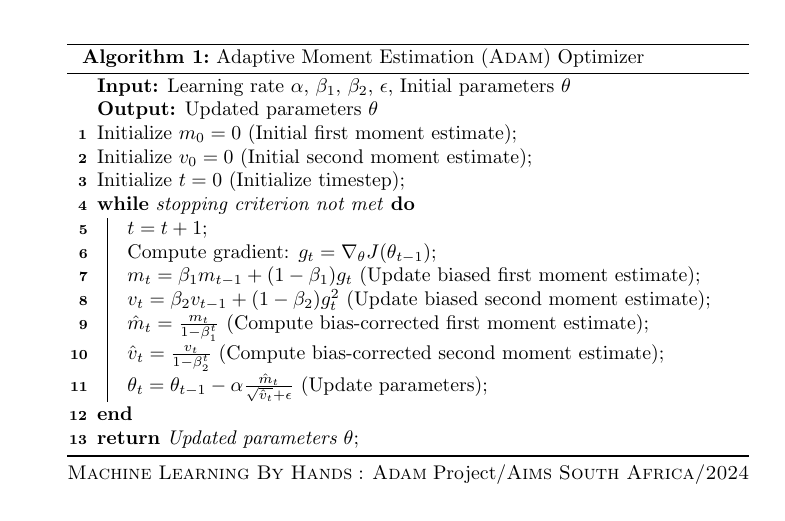

In [ ]:
#Algorithm 1: ADAM Optimizer
from IPython.display import Image
pathway_image = '/content/drive/MyDrive/MACHINE_LEARNING/ML_BY_HAND/Oral_presentation/My_algoADAM_Emmanuel.png'
Image(pathway_image)

**2.3 Experimentations**

In terms of application, we compared the performance of SGD with Adam by using the MINST dataset. The [MINST](https://www.geeksforgeeks.org/mnist-dataset/) dataset, which stands for `Modified National Institute of Standards and Technology`,. The dataset contains a large collection of handwritten digits (0-9) that is commonly used for training various image processing systems. This dataset was created by re-mixing samples from NIST's original datasets, which were taken from American Census Bureau employees and high school students. It was designed to helpassist scientists in developing and testing machine learning algorithms in pattern recognition and machine learning.`The dataset consists of 60,000` training images and `10,000` testing images. We adapted the code from [Shiksha](https://www.shiksha.com/online-courses/articles/adam-optimizer-for-stochastic-gradient-descent/) and [Mohamed Reyad, and all.](https://link.springer.com/article/10.1007/s00521-023-08568-z) The digits have been centered in a fixed-size (28 × 28 pixels) gray-image, with pixel values ranging from 0 to 255. All images awere converted to the float32 data type with size-normalized values in the range from 0 to 1.



Next, we built a CNN for image classification tasks. It begins with a convolutional layer having 32 filters, each with a 3x3 kernel, followed by a rectified linear unit (ReLU) activation function. Then, a max-pooling layer with a 2x2 pool size is applied to reduce the spatial dimensions. To prevent overfitting, a dropout layer with a rate of 0.25 is added. The output is then flattened into a 1D array and passed through a dense layer with 256 neurons and a ReLU activation function. Another dropout layer with a rate of 0.5 is included to further regularize the network. Finally, a dense layer with 10 neurons and a softmax activation function is used to output the classification probabilities. The model is compiled with categorical cross-entropy loss, the specified optimizer, and accuracy metrics. It is trained for 10 epochs with a batch size of 64.

**2.4. Coding in action**

In [ ]:
# #@title Original Adam
# class AdamOptimizer:
#     def __init__(self, weights, alpha=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
#         self.alpha = alpha
#         self.beta1 = beta1
#         self.beta2 = beta2
#         self.epsilon = epsilon
#         self.m = 0
#         self.v = 0
#         self.t = 0
#         self.theta = weights

#     def backward_pass(self, gradient):
#         self.t = self.t + 1
#         self.m = self.beta1*self.m + (1 - self.beta1)*gradient
#         self.v = self.beta2*self.v + (1 - self.beta2)*(gradient**2)
#         m_hat = self.m/(1 - self.beta1**self.t)
#         v_hat = self.v/(1 - self.beta2**self.t)
#         self.theta = self.theta - self.alpha*(m_hat/(np.sqrt(v_hat) - self.epsilon))
#         return self.theta

 **2.4.1. Libraries and Data Loading**

In [ ]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Optimizer
import time

 **2.4.2. Usefull functions**

In [ ]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def categorical_accuracy(y_true, y_pred):
    return np.mean(np.equal(np.argmax(y_true, axis=-1), np.argmax(y_pred, axis=-1)).astype(np.float32))

def categorical_crossentropy(y_true, y_pred):
    epsilon = 1e-7  # small constant to avoid numerical instability
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # clip to avoid log(0)
    return -np.sum(y_true * np.log(y_pred), axis=-1)


**2.4.3. Custom Adam and SGD Optimizers**

In [ ]:
class Adam(Optimizer):
    def __init__(self, learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, **kwargs):
        super(Adam, self).__init__(**kwargs)
        self.learning_rate = learning_rate
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.epsilon = epsilon
        self.iterations = K.variable(0, dtype='int64')

    def get_updates(self, loss, params):
        grads = self.get_gradients(loss, params)
        self.updates = [K.update_add(self.iterations, 1)]
        lr = self.learning_rate
        t = K.cast(self.iterations, K.floatx()) + 1
        lr_t = lr * K.sqrt(1. - K.pow(self.beta_2, t)) / (1. - K.pow(self.beta_1, t))

        for p, g in zip(params, grads):
            m = K.zeros_like(p)
            v = K.zeros_like(p)
            m_t = (self.beta_1 * m) + (1. - self.beta_1) * g
            v_t = (self.beta_2 * v) + (1. - self.beta_2) * K.square(g)
            p_t = p - lr_t * m_t / (K.sqrt(v_t) + self.epsilon)
            self.updates.append(K.update(m, m_t))
            self.updates.append(K.update(v, v_t))
            new_p = p_t
            self.updates.append(K.update(p, new_p))
        return self.updates

    def get_config(self):
        config = {
            'learning_rate': float(K.get_value(self.learning_rate)),
            'beta_1': float(K.get_value(self.beta_1)),
            'beta_2': float(K.get_value(self.beta_2)),
            'epsilon': self.epsilon
        }
        base_config = super(Adam, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

class SGD(Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0., nesterov=False, **kwargs):
        super(SGD, self).__init__(**kwargs)
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.nesterov = nesterov

    def get_updates(self, loss, params):
        grads = self.get_gradients(loss, params)
        self.updates = []
        lr = self.learning_rate

        for p, g in zip(params, grads):
            m = K.zeros_like(p)
            v = self.momentum * m - lr * g
            self.updates.append(K.update(m, v))
            if self.nesterov:
                new_p = p + self.momentum * v - lr * g
            else:
                new_p = p + v
            self.updates.append(K.update(p, new_p))
        return self.updates

    def get_config(self):
        config = {
            'learning_rate': float(K.get_value(self.learning_rate)),
            'momentum': float(K.get_value(self.momentum)),
            'nesterov': self.nesterov
        }
        base_config = super(SGD, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


 **2.4.4. Model Building and Training**

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to fit the CNN input shape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Normalize the input data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Define the model architecture
def build_model(optimizer):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Training parameters
batch_size = 64
epochs = 10
optimizers = ['Adam', 'SGD']
histories = {}

# Train the model for each optimizer
for opt in optimizers:
    print(f'******************** Optimizer = {opt} ****************************')
    start_time = time.time()  # Record the start time
    model = build_model(opt)
    hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    end_time = time.time()  # Record the end time
    duration = end_time - start_time  # Calculate the duration

    print(f'Total duration for {opt}: {duration:.2f} seconds')

    histories[opt] = hist
    print(f"******************* End of the model using {opt} ********************")

11490434/11490434 [==============================] - 0s 0us/step
******************** Optimizer = Adam ****************************
Epoch 1/10
938/938 [==============================] - 50s 53ms/step - loss: 0.2334 - accuracy: 0.9289 - val_loss: 0.0696 - val_accuracy: 0.9787
Epoch 2/10
938/938 [==============================] - 44s 46ms/step - loss: 0.0931 - accuracy: 0.9712 - val_loss: 0.0465 - val_accuracy: 0.9831
Epoch 3/10
938/938 [==============================] - 43s 46ms/step - loss: 0.0690 - accuracy: 0.9791 - val_loss: 0.0417 - val_accuracy: 0.9859
Epoch 4/10
938/938 [==============================] - 43s 46ms/step - loss: 0.0557 - accuracy: 0.9825 - val_loss: 0.0370 - val_accuracy: 0.9873
Epoch 5/10
938/938 [==============================] - 42s 45ms/step - loss: 0.0470 - accuracy: 0.9846 - val_loss: 0.0368 - val_accuracy: 0.9874
Epoch 6/10
938/938 [==============================] - 43s 45ms/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0357 - val_accuracy: 0.9880
Epoc

 **2.4.5. Animated plot for Losses**

In [ ]:
!apt-get install imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  imagemagick-6.q16 libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10 libwmflite-0.2-7 netpbm
  poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x imagemagick-doc
  autotrace cups-bsd | lpr | lprng enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer
  povray radiance sane-utils texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev
  inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nan

In [ ]:
class LossAnimationPlotter:
    def __init__(self, sgd_losses, adam_losses):
        self.sgd_losses = sgd_losses
        self.adam_losses = adam_losses

    def animate(self, save_path=False): # Added save_path parameter
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_xlim(0, len(self.sgd_losses))
        ax.set_ylim(0, max(max(self.sgd_losses), max(self.adam_losses)))
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Loss')
        ax.set_title('Evolution of Loss Functions (SGD vs. ADAM)')
        line_sgd, = ax.plot([], [], label='SGD')
        line_adam, = ax.plot([], [], label='ADAM')
        ax.legend()

        def update(frame):
            line_sgd.set_data(range(frame), self.sgd_losses[:frame])
            line_adam.set_data(range(frame), self.adam_losses[:frame])
            return line_sgd, line_adam

        def end_event():
            plt.close()

        ani = animation.FuncAnimation(fig, update, frames=len(self.sgd_losses), interval=50, blit=True)
        ani.event_source.stop()
        ani.event_source.start()
        ani.event_source.callback = end_event

        if save_path:
            writer = animation.ImageMagickWriter(fps=20)
            ani.save(save_path, writer=writer)

        return HTML(ani.to_jshtml())

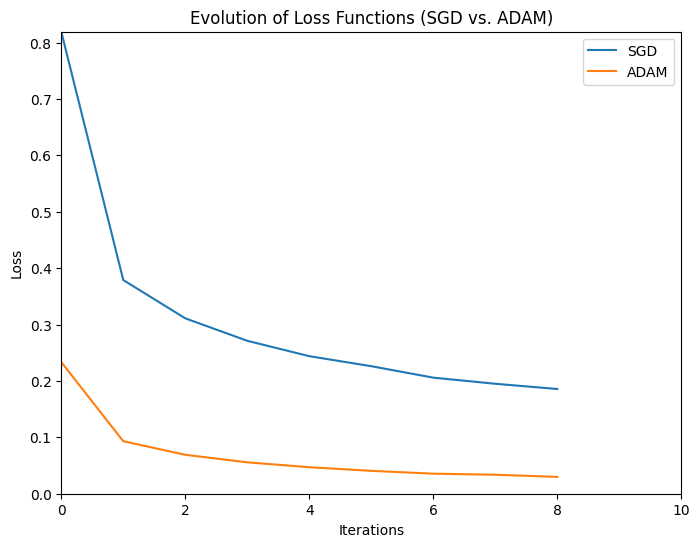

In [ ]:
# Histories
sgd_losses = histories['SGD'].history['loss']
adam_losses = histories['Adam'].history['loss']

# Save in Drive
save_folder_path ='/content/drive/MyDrive/MACHINE_LEARNING/ML_BY_HAND/Oral_presentation/'

# Let's go
loss_animation_plotter = LossAnimationPlotter(sgd_losses, adam_losses)
loss_animation_plotter.animate(save_path=save_folder_path+"loss_animation.mp4")

 **2.4.6. Animated plots for  Accuracies**

In [ ]:
class AccuracyAnimationPlotter:
    def __init__(self, sgd_acc, adam_acc):
        self.sgd_acc = sgd_acc
        self.adam_acc = adam_acc

    def animate(self, save_path=None):
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_xlim(0, len(self.sgd_acc))
        ax.set_ylim(0, 1.1)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Accuracy')
        ax.set_title('Evolution of Accuracy (SGD vs. ADAM)')
        line_sgd_acc, = ax.plot([], [], label='SGD')
        line_adam_acc, = ax.plot([], [], label='ADAM')
        ax.legend()

        def update(frame):
            line_sgd_acc.set_data(range(frame), self.sgd_acc[:frame])
            line_adam_acc.set_data(range(frame), self.adam_acc[:frame])
            return line_sgd_acc, line_adam_acc

        def end_event():
            plt.close()

        ani = animation.FuncAnimation(fig, update, frames=len(self.sgd_acc), interval=50, blit=True)
        ani.event_source.stop()
        ani.event_source.start()
        ani.event_source.callback = end_event

        if save_path:
            writer = animation.ImageMagickWriter(fps=20)
            ani.save(save_path, writer=writer)

        return HTML(ani.to_jshtml())

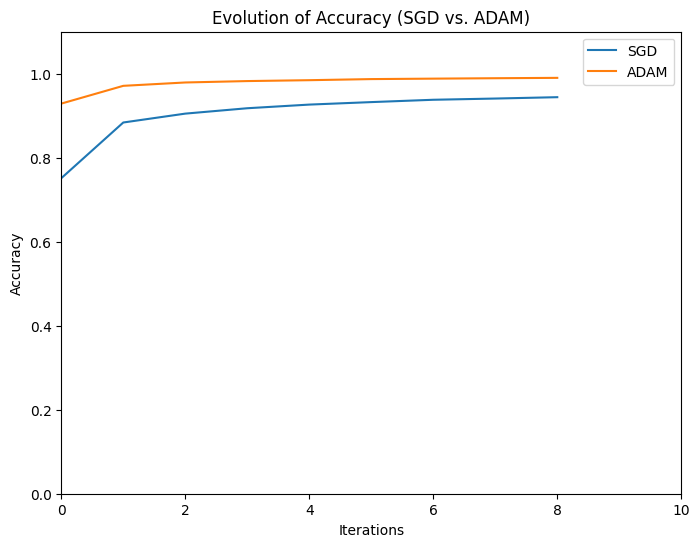

In [ ]:

sgd_acc = histories['SGD'].history['accuracy']
adam_acc = histories['Adam'].history['accuracy']


save_folder_path = "/content/drive/MyDrive/MACHINE_LEARNING/ML_BY_HAND/Oral_presentation/"


accuracy_animation_plotter = AccuracyAnimationPlotter(sgd_acc, adam_acc)
accuracy_animation_plotter.animate(save_path=save_folder_path + "accuracy_animation.mp4")

# **3. Conclusion**
The comparison between the Adam and SGD optimizers on the MNIST dataset reveals significant differences in their performance. **Adam** shows an intresting convergence, achieving an impressive accuracy of **99.15%** on the training set and **99.04%** on the validation set within **564.69** seconds. Its ability to adapt learning rates for each parameter dynamically contributes to its efficiency in navigating the complex optimization landscape. On the other hand, **SGD**, while still effective, demonstrates a slower convergence rate, reaching an accuracy of **94.62%** on the training set and **96.66%** on the validation set in **502.92** seconds. Its reliance on a fixed learning rate and momentum may lead to oscillations or slow progress, particularly in regions with steep gradients. Overall, Adam clearly outperforms SGD.


# **4. References**

- **Diederik P. Kingma** and **Jimmy Lei Ba**. [ADAM: A METHOD FOR STOCHASTIC OPTIMIZATION](https://arxiv.org/pdf/1412.6980), 2017.

- **Artem Oppermann**.  [Optimization in Deep Learning: AdaGrad, RMSProp, ADAM](https://artemoppermann.com/optimization-in-deep-learning-adagrad-rmsprop-adam/).

- **Mohamed Reyad, and all.** [A modified Adam algorithm for deep neural network optimization](https://link.springer.com/article/10.1007/s00521-023-08568-z), 2023.


- **Shiksha**. [Adam Optimizer for Stochastic Gradient Descent](https://www.shiksha.com/online-courses/articles/adam-optimizer-for-stochastic-gradient-descent/), 2023.

- **Jason Brownlee**. [Gradient Descent With Momentum from Scratch](https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/), 2021.

- **Kevin P Murphy**. [Probabilistic machine learning : An introduction](https://mitpress.mit.edu/9780262046824/probabilistic-machine-learning/). MIT press, 2022.
